# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [1]:
!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [2]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-04 17:09:43--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 1736600 (1,7M) [text/plain]
Saving to: ‘training_dataset.csv.4’

training_dataset.cs 100%[===================>]   1,66M  1,74MB/s    in 1,0s    

2020-09-04 17:09:45 (1,74 MB/s) - ‘training_dataset.csv.4’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [3]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [4]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

In [5]:
for column in ['horas_semanais_estudo','total_modulos','modulos_iniciados','modulos_finalizados','certificados']:
    df_training_dataset[column] = df_training_dataset[column].fillna(df_training_dataset.groupby('categoria')[column].transform('mean'))

In [6]:
most_common = df_training_dataset[[
    'categoria',
    'graduacao','universidade','profissao','organizacao','pretende_fazer_cursos_lit', 'interesse_mba_lit', 'importante_ter_certificado','como_conheceu_lit'
]].groupby(['categoria']).agg(lambda x:x.value_counts().index[0])

for column in ['graduacao','universidade','profissao','organizacao','pretende_fazer_cursos_lit', 'interesse_mba_lit', 'importante_ter_certificado','como_conheceu_lit']:
    df_training_dataset[column] = df_training_dataset.apply(
        lambda row: most_common.loc[row['categoria']][column] if pd.isna(row[column]) else row[column],
        axis=1
    )

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [7]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1912
graduacao                        0
universidade                     0
profissao                        0
organizacao                      0
pretende_fazer_cursos_lit        0
interesse_mba_lit                0
importante_ter_certificado       0
horas_semanais_estudo            0
como_conheceu_lit                0
total_modulos                    0
modulos_iniciados                0
modulos_finalizados              0
certificados                     0
categoria                        0
dtype: int64



In [8]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [9]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1912
graduacao                        0
universidade                     0
profissao                        0
organizacao                      0
pretende_fazer_cursos_lit        0
interesse_mba_lit                0
importante_ter_certificado       0
horas_semanais_estudo            0
como_conheceu_lit                0
total_modulos                    0
modulos_iniciados                0
modulos_finalizados              0
certificados                     0
categoria                        0
dtype: int64



### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [11]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1912
graduacao                        0
universidade                     0
profissao                        0
organizacao                      0
pretende_fazer_cursos_lit        0
interesse_mba_lit                0
importante_ter_certificado       0
horas_semanais_estudo            0
como_conheceu_lit                0
total_modulos                    0
modulos_iniciados                0
modulos_finalizados              0
certificados                     0
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [12]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,Outros,10.0,10.621303,7.777862,0.080993,perfil6
15853,229931283.0,Bacharelado,UNIVERSIDADE PRESBITERIANA MACKENZIE,Advogado,Estado,0.0,0.0,1.0,7.0,Linkedin,42.0,17.000000,15.000000,0.056852,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,Estado,0.0,1.0,1.0,7.0,Outros,30.0,9.000000,8.000000,0.000000,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,Outros,226.0,102.000000,93.000000,1.000000,perfil1
15856,743652801.0,Bacharelado,FGV-RJ,Analista Senior,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.000000,97.000000,1.000000,perfil1


In [13]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id'], inplace=False)

In [14]:
df_training_dataset_rmcolumns.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,Outros,10.0,10.621303,7.777862,0.080993,perfil6
15853,Bacharelado,UNIVERSIDADE PRESBITERIANA MACKENZIE,Advogado,Estado,0.0,0.0,1.0,7.0,Linkedin,42.0,17.000000,15.000000,0.056852,perfil5
15854,Tecnólogo,UNIP,Sócio/Dono/Proprietário,Estado,0.0,1.0,1.0,7.0,Outros,30.0,9.000000,8.000000,0.000000,perfil5
15855,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,Outros,226.0,102.000000,93.000000,1.000000,perfil1
15856,Bacharelado,FGV-RJ,Analista Senior,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.000000,97.000000,1.000000,perfil1


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [15]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['graduacao','universidade','profissao','organizacao','como_conheceu_lit'])
df_training.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,graduacao_Bacharelado,...,organizacao_servicos,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube
15852,0.0,0.0,1.0,8.0,10.0,10.621303,7.777862,0.080993,perfil6,1,...,0,0,0,0,0,0,0,1,0,0
15853,0.0,0.0,1.0,7.0,42.0,17.000000,15.000000,0.056852,perfil5,1,...,0,0,0,0,1,0,0,0,0,0
15854,0.0,1.0,1.0,7.0,30.0,9.000000,8.000000,0.000000,perfil5,0,...,0,0,0,0,0,0,0,1,0,0
15855,0.0,0.0,1.0,10.0,226.0,102.000000,93.000000,1.000000,perfil1,0,...,0,0,0,0,0,0,0,1,0,0
15856,1.0,1.0,1.0,9.0,125.0,98.000000,97.000000,1.000000,perfil1,1,...,0,0,0,0,0,0,0,1,0,0


# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [16]:
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO

In [17]:
features = df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO',
       'universidade_UNIVERSIDADE PRESBITERIANA MACKENZIE', 'universidade_USP',
       'universidade_Unesp',
       'universidade_Universidade Metodista de Sao Paulo',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'organizacao_Borracha',
       'organizacao_Eletrodomesticos', 'organizacao_Eletroeletronicos',
       'organizacao_Entretenimento', 'organizacao_Estado',
       'organizacao_Laminados', 'organizacao_Montadora',
       'organizacao_Oleo e Gas', 'organizacao_Siderurgica',
       'organizacao_e-commerce', 'organizacao_servicos',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.00001, random_state=133)

In [42]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

### Treinando uma árvore de decisão

In [43]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
dtc = xgb.XGBClassifier(learning_rate=0.005,  
                      n_estimators=1000, 
                      max_depth=50, 
                      gamma=10).fit(X_train_SMOTE, y_train_SMOTE)

### Fazendo previsões na amostra de teste

In [44]:
y_pred = dtc.predict(X_test)
print(y_pred)

['perfil2']


### Analisando a qualidade do modelo através da matriz de confusão

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

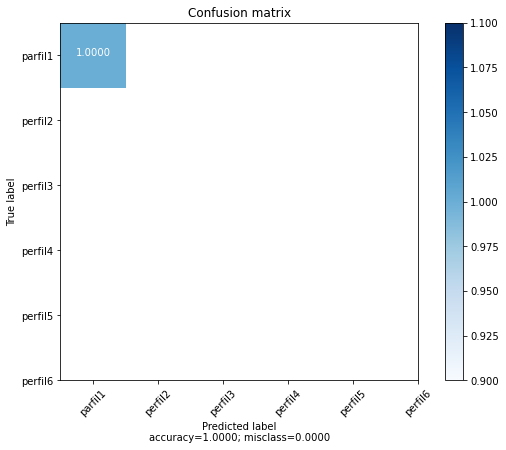

In [46]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

In [47]:
from sklearn.metrics import classification_report
target_names = ['perfil1', 'perfil2','perfil3','perfil4','perfil5','perfil6']
print(classification_report(y_test, y_pred, target_names=target_names))

ValueError: Number of classes, 1, does not match size of target_names, 6. Try specifying the labels parameter

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [57]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-04 18:39:19--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...151.101.0.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv.2’

to_be_scored.csv.2  100%[===================>]  94,03K   481KB/s    in 0,2s    

2020-09-04 18:39:19 (481 KB/s) - ‘to_be_scored.csv.2’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [58]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [59]:

# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id'], inplace=False)

# 4 - Encoding com "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['graduacao','universidade','profissao','organizacao','como_conheceu_lit'])

df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,graduacao_Bacharelado,graduacao_Especialização,...,organizacao_servicos,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube
995,0,0,1,2,245,63,45,1,0,0,...,0,0,0,0,0,0,0,0,0,1
996,1,1,1,8,163,111,96,0,1,0,...,0,0,1,0,0,0,0,0,0,0
997,1,1,1,9,56,10,4,0,1,0,...,0,1,0,0,0,0,0,0,0,0
998,1,1,1,9,138,60,30,0,0,0,...,1,0,0,0,0,0,1,0,0,0
999,0,0,1,9,22,20,19,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [60]:
df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO',
       'universidade_UNIVERSIDADE PRESBITERIANA MACKENZIE', 'universidade_USP',
       'universidade_Unesp',
       'universidade_Universidade Metodista de Sao Paulo',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'organizacao_Borracha',
       'organizacao_Eletrodomesticos', 'organizacao_Eletroeletronicos',
       'organizacao_Entretenimento', 'organizacao_Estado',
       'organizacao_Laminados', 'organizacao_Montadora',
       'organizacao_Oleo e Gas', 'organizacao_Siderurgica',
       'organizacao_e-commerce', 'organizacao_servicos',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube'
    ]
].columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO',
       'un

In [61]:
df_to_be_scored_4.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo',
       'universidade_CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ',
       'universidade_Escola Paulista de Direito',
       'universidade_FACULDADE ANHANGUERA', 'universidade_FATEC',
       'universidade_FGV-RJ',
       'universidade_INSPER INSTITUTO DE ENSINO E PESQUISA',
       'universidade_UEPB', 'universidade_UFF', 'universidade_UFPE',
       'universidade_UFRJ', 'universidade_UFRN', 'universidade_UFSCar',
       'universidade_UNICAMP', 'universidade_UNIP',
       'universidade_UNIVERSIDADE CRUZEIRO DO SUL',
       'universidade_UNIVERSIDADE ESTADUAL DE PONTA GROSSA',
       'universidade_UNIVERSIDADE NOVE DE JULHO',
       'un

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [62]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,graduacao_Bacharelado,graduacao_Especialização,...,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube,target
995,0,0,1,2,245,63,45,1,0,0,...,0,0,0,0,0,0,0,0,1,perfil1
996,1,1,1,8,163,111,96,0,1,0,...,0,1,0,0,0,0,0,0,0,perfil2
997,1,1,1,9,56,10,4,0,1,0,...,1,0,0,0,0,0,0,0,0,perfil6
998,1,1,1,9,138,60,30,0,0,0,...,0,0,0,0,0,1,0,0,0,perfil2
999,0,0,1,9,22,20,19,0,0,1,...,0,0,0,0,0,1,0,0,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [63]:
df_to_be_scored_4.to_csv("results1.csv")

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
